# Work Directory

In [1]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\shanc'

In [2]:
os.chdir('c:\\OnlineLearn\Datacamp_Python')
os.getcwd()

'c:\\OnlineLearn\\Datacamp_Python'

# Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as matplotlib
from sklearn import linear_model

# Import Data

In [4]:
cr_loan =pd.read_csv("cr_loan_w2.csv", sep=",")
cr_loan.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


In [5]:
print(cr_loan.dtypes)

person_age                          int64
person_income                       int64
person_emp_length                   int64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE      int64
person_home_ownership_OTHER         int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_DEBTCONSOLIDATION       int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
loan_grade_A                        int64
loan_grade_B                        int64
loan_grade_C                        int64
loan_grade_D                        int64
loan_grade_E                        int64
loan_grade_F                      

In [6]:
row_count = len(cr_loan)
print("Number of rows:", row_count)

Number of rows: 29459


In [7]:
cr_loan_clean = cr_loan

# Correlation Check

## Findings:
### *cb_person_cred_hist_length and person_age are highly correlated (0.88)
### *loan_grade_A and loan_int_rate (-0.8)
### *person_home_ownership_MORTGAGE and person_home_ownership_RENT (-0.8)

<ipython-input-8-29fa55cb4784>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cr_loan_clean.corr(), dtype=np.bool))


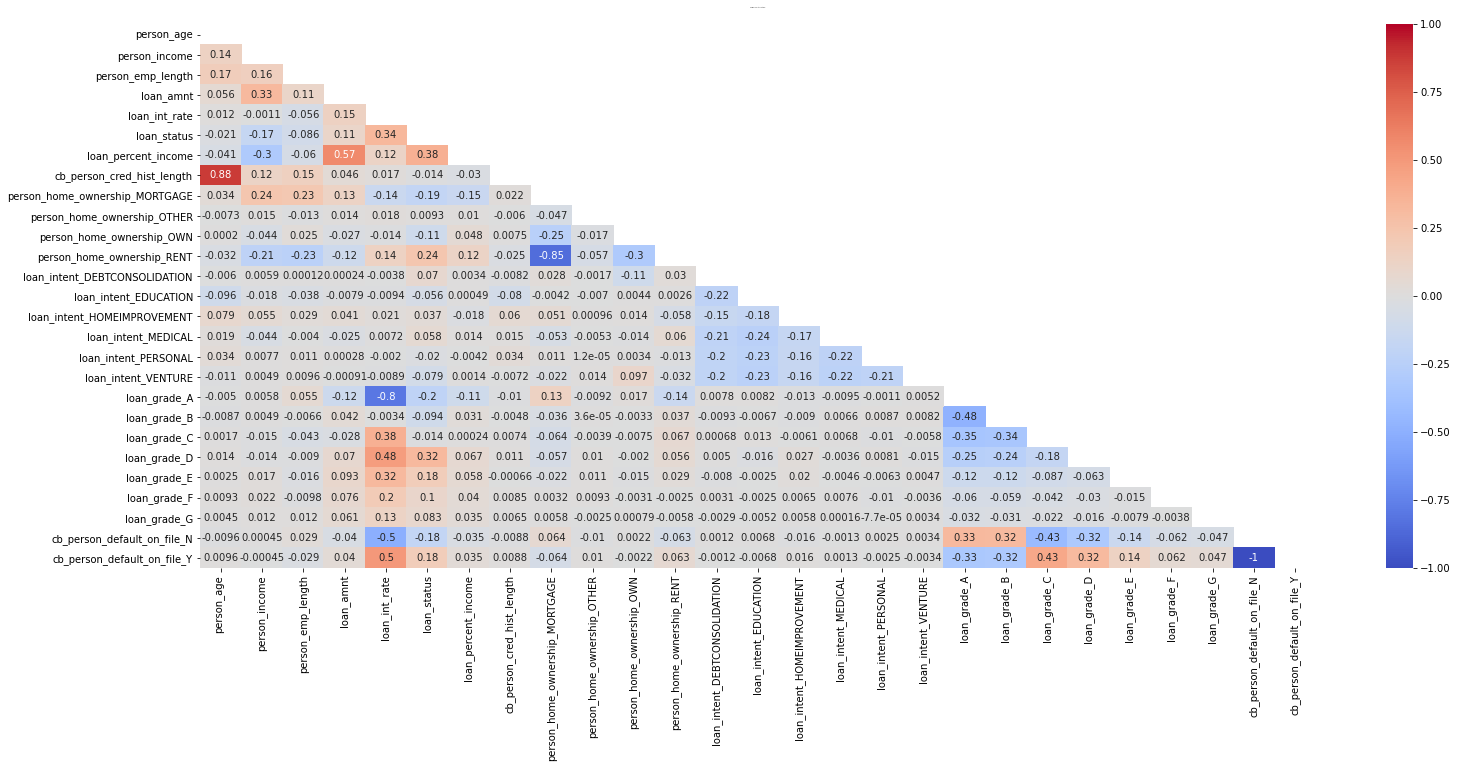

In [8]:
plt.figure(figsize=(25, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cr_loan_clean.corr(), dtype=np.bool))
heatmap = sns.heatmap(cr_loan_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':1}, pad=16);

# Logistic Regression 1-1: Interest Rate vs Status

In [9]:
# Create the X and y data sets

X = cr_loan_clean[['loan_int_rate']]

y = cr_loan_clean[['loan_status']]

In [10]:
# Create and fit a logistic regression model

clf_logistic_single = linear_model.LogisticRegression(solver='lbfgs')

clf_logistic_single.fit(X, np.ravel(y))


LogisticRegression()

In [11]:
# Print the parameters of the model

print(clf_logistic_single.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [12]:
# Print the intercept of the model
print(clf_logistic_single.intercept_)

[-4.45785901]


In [13]:
# Print the coefficient of the model
# > 0 implies positive relationship between interest rate and default
# higher the interest rate, higher the change of going into default
print(clf_logistic_single.coef_)

[[0.27144214]]


# Logistic Regression 1-2: Personal Income vs Status

In [14]:
X = cr_loan_clean[['person_income']]

y = cr_loan_clean[['loan_status']]

In [15]:
clf_logistic_single = linear_model.LogisticRegression(solver='lbfgs')

clf_logistic_single.fit(X, np.ravel(y))

LogisticRegression()

In [16]:
print(clf_logistic_single.intercept_)

[-3.0352158e-10]


In [17]:
# Print the coefficient of the model
# <0 implies a nagetive relationship between person_income and default
# higher the income, lower the change of going into default
print(clf_logistic_single.coef_)

[[-2.19505677e-05]]


# Logistic Regression 2: Fit a Model with 3 Variables

In [18]:
# Create the X and y data sets

X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]

y = cr_loan_clean[['loan_status']]


In [19]:
# Use test_train_split to create the training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)


In [20]:
# Create and fit the logistic regression model

clf_logistic = linear_model.LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [21]:
# Print the models coefficients

print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


# Logistic Regression 2: Prediction - Take first 5 as example

In [22]:
# Create predictions of probability for loan status using test data

preds = clf_logistic.predict_proba(X_test)

In [23]:
# Create dataframes of first five predictions, and first five true labels

preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])

true_df = y_test.head(5)

In [24]:
# Concatenate and print the two data frames for comparison

print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.273397
1            1      0.211796
2            0      0.206394
3            0      0.185875
4            1      0.218026


# Logistic Regression 2: Prediction and Accuracy

In [25]:
# Create a dataframe for the probabilities of default

preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

### Threshold of default = 1 based on probability > 0.5

In [26]:
# Reassign loan status based on the threshold
# this should be based on business request

preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)


In [27]:
# Print the row counts for each loan status

print(preds_df['loan_status'].value_counts())

0    11784
Name: loan_status, dtype: int64


### Classification Report: F1 Score

In [28]:
# Print the classification report
from sklearn.metrics import classification_report

target_names = ['Non-Default', 'Default']

print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.78      1.00      0.88      9198
     Default       0.00      0.00      0.00      2586

    accuracy                           0.78     11784
   macro avg       0.39      0.50      0.44     11784
weighted avg       0.61      0.78      0.68     11784



C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Print all the non-average values from the report
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.7805499, 0.       ]), array([1., 0.]), array([0.8767515, 0.       ]), array([9198, 2586], dtype=int64))


C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# Print the precision rate from the report

print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0])

[0.7805499 0.       ]


C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy

In [31]:
# Print the accuracy score the model

print(clf_logistic.score(X_test, y_test))

0.7805498981670062


### ROC Curve

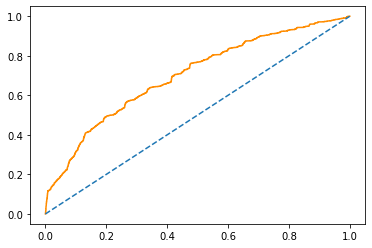

In [32]:
# Plot the ROC curve of the probabilities of default
from sklearn.metrics import roc_curve

prob_default = preds[:, 1]

fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)

plt.plot(fallout, sensitivity, color = 'darkorange')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.show()


In [33]:
# Compute the AUC and store it in a variable
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, prob_default)

### Confusion Matrix

In [34]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,preds_df['loan_status']))

[[9198    0]
 [2586    0]]


# Logistic Regression 2: Accuracy of Different Threshold
### Threshold of default = 1 based on probability > 0.4
####  Note: Accuracy higher than threshold of > 0.5

In [35]:
# Reassign the values of loan status based on the new threshold

preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)


In [36]:
# Print the classification report
from sklearn.metrics import classification_report

target_names = ['Non-Default', 'Default']

print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.80      0.99      0.88      9198
     Default       0.80      0.09      0.16      2586

    accuracy                           0.80     11784
   macro avg       0.80      0.54      0.52     11784
weighted avg       0.80      0.80      0.73     11784



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Perform stepwise regression
sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features=3,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(X, y)

C:\Users\shanc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

# XGBoost Model

In [38]:
# Train a model

import xgboost as xgb

clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

In [39]:
# Predict with a model

gbt_preds = clf_gbt.predict_proba(X_test)

In [40]:
# Create dataframes of first five predictions, and first five true labels

preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])

true_df = y_test.head(5)

In [41]:
# Concatenate and print the two data frames for comparison

print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.149744
1            1      0.146094
2            0      0.009049
3            0      0.077053
4            1      0.086527


## XGBoost Model: Default vs Non-Default

In [42]:
# Predict the labels for loan status

gbt_preds = clf_gbt.predict(X_test)

In [43]:
# Check the values created by the predict method

print(gbt_preds)

[0 0 0 ... 0 0 0]


In [44]:
# Print the classification report of the model

target_names = ['Non-Default', 'Default']

## XGBoost Model: F1 Score

In [45]:
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.95      0.90      9198
     Default       0.70      0.45      0.54      2586

    accuracy                           0.84     11784
   macro avg       0.78      0.70      0.72     11784
weighted avg       0.82      0.84      0.82     11784



## XGBoost: 3-variable model

In [46]:
# Create and train the model on the training data
#X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]

clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

In [47]:
# Print the column importances from the model

print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_int_rate': 1475.0, 'person_emp_length': 879.0, 'person_income': 1438.0}


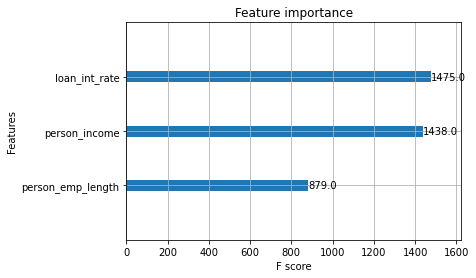

In [48]:
# Plot the column importance for this model

xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

## XGBoost: 2-variable model

In [49]:
X2_train = X_train[['loan_int_rate','person_emp_length']]
X2_test = X_test[['loan_int_rate','person_emp_length']]

In [50]:
# Train a model on the X data with 2 columns

clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

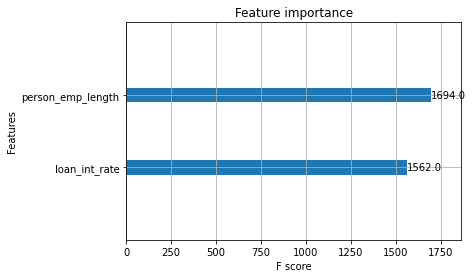

In [51]:
# Plot the column importance for this model

xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

## Compare prediction of the 3-var and 2-var model

In [52]:
# Predict the loan_status using each model

gbt_preds = clf_gbt.predict(X_test)

gbt2_preds = clf_gbt2.predict(X2_test)

In [53]:
# Print the classification report of the first model

target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

print(classification_report(y_test, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.95      0.90      9198
     Default       0.70      0.45      0.54      2586

    accuracy                           0.84     11784
   macro avg       0.78      0.70      0.72     11784
weighted avg       0.82      0.84      0.82     11784

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      9198
     Default       0.66      0.28      0.40      2586

    accuracy                           0.81     11784
   macro avg       0.74      0.62      0.64     11784
weighted avg       0.79      0.81      0.78     11784



In [54]:
# Print the confusion matrix for both old and new models

print(confusion_matrix(y_test,gbt_preds))

print(confusion_matrix(y_test,gbt2_preds))

[[8700  498]
 [1435 1151]]
[[8814  384]
 [1849  737]]


In [55]:
# Print and compare the AUC scores of the old and new models

print(roc_auc_score(y_test, gbt_preds))

print(roc_auc_score(y_test, gbt2_preds))

0.6954733678107164
0.6216239634461037


# XGBoost with Cross-Validation

In [56]:
# Set the values for number of folds and stopping iterations

n_folds = 5
early_stopping = 10

In [57]:
# Create the DTrain matrix for XGBoost

DTrain = xgb.DMatrix(X_train, label = y_train)

In [58]:
params = {"max_depth": 2, "eta": 1, "objective": "binary:logistic"}

In [59]:
# Create the data frame of cross validations

cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,

            early_stopping_rounds=early_stopping)

In [60]:
# Print the cross validations data frame

print(cv_df)


   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0            0.443562           0.002937           0.443795          0.009508
1            0.418162           0.002499           0.419923          0.007963
2            0.410227           0.002134           0.412365          0.008195
3            0.406786           0.002243           0.408690          0.008276
4            0.404097           0.002155           0.407161          0.007407


In [61]:
# Print the first five rows of the CV results data frame

print(cv_df.head())

   train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0            0.443562           0.002937           0.443795          0.009508
1            0.418162           0.002499           0.419923          0.007963
2            0.410227           0.002134           0.412365          0.008195
3            0.406786           0.002243           0.408690          0.008276
4            0.404097           0.002155           0.407161          0.007407


## XGBoost with hyperparameters

In [62]:
# Create a gradient boosted tree model using two hyperparameters

gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)


In [63]:
# Calculate the cross validation scores for 4 folds
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

In [64]:
# Print the cross validation scores

print(cv_scores)

[0.84340348 0.83322019 0.84340348 0.82933454]


In [65]:
# Print the average accuracy and standard deviation of the scores

print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),

                                              cv_scores.std() * 2))

Average accuracy: 0.84 (+/- 0.01)


# Undersample of Non-defaults

In [66]:
X_y_train = pd.concat([X_train,y_train])

In [67]:
# Create data sets for defaults and non-defaults

nondefaults = X_y_train[X_y_train['loan_status'] == 0]

defaults = X_y_train[X_y_train['loan_status'] == 1]


In [68]:
len(defaults)

3877

In [69]:
# Undersample the non-defaults

nondefaults_under = nondefaults.sample(len(defaults))

In [70]:
# check non-defaults row count after undersampling
len(nondefaults_under)

3877

In [71]:
# Concatenate the undersampled nondefaults with defaults

X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),

                             defaults.reset_index(drop = True)], axis = 0)


In [72]:
# Print the value counts for loan status

print(X_y_train_under['loan_status'].value_counts())

0.0    3877
1.0    3877
Name: loan_status, dtype: int64


## Logistic Regression Classification Report

In [73]:
#X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
# Create predictions of probability for loan status using test data
preds_df_lr = clf_logistic.predict(X_test)

# Print the logistic regression classification report

target_names = ['Non-Default', 'Default']

print(classification_report(y_test, preds_df_lr, target_names=target_names))


              precision    recall  f1-score   support

 Non-Default       0.78      1.00      0.88      9198
     Default       0.00      0.00      0.00      2586

    accuracy                           0.78     11784
   macro avg       0.39      0.50      0.44     11784
weighted avg       0.61      0.78      0.68     11784



C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(precision_recall_fscore_support(y_test,preds_df_lr, average = 'macro')[2])

0.4383757506434086


C:\Users\shanc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosted Tree Classification Report

In [75]:
# Create predictions of probability for loan status using test data

preds_df_gbt = clf_gbt.predict(X_test)

# Print the gradient boosted tree classification report

target_names = ['Non-Default', 'Default']

print(classification_report(y_test, preds_df_gbt, target_names=target_names))


              precision    recall  f1-score   support

 Non-Default       0.86      0.95      0.90      9198
     Default       0.70      0.45      0.54      2586

    accuracy                           0.84     11784
   macro avg       0.78      0.70      0.72     11784
weighted avg       0.82      0.84      0.82     11784



In [76]:
# Print the default F-1 scores for the gradient boosted tree

print(precision_recall_fscore_support(y_test,preds_df_gbt, average = 'macro')[2])

0.721790521446315


# ROC Chart

In [77]:
# ROC chart components

fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds_df_lr)

fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_df_gbt)

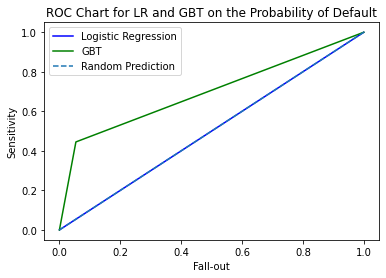

In [78]:
# ROC Chart with both

plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')

plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')

plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')

plt.title("ROC Chart for LR and GBT on the Probability of Default")

plt.xlabel('Fall-out')

plt.ylabel('Sensitivity')

plt.legend()

plt.show()



Logistic Regression AUC Score: 0.50
Gradient Boosted Tree AUC Score: 0.70


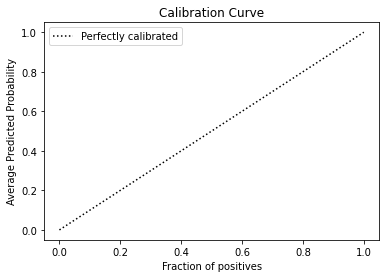

In [79]:
# Print the logistic regression AUC with formatting

print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_lr))

# Print the gradient boosted tree AUC with formatting

print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_gbt))

# Create the calibration curve plot with the guideline

plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')   

plt.xlabel('Fraction of positives')

plt.ylabel('Average Predicted Probability')

plt.legend()

plt.title('Calibration Curve')

plt.show()

# Calibration Curve
### https://scikit-learn.sourceforge.net/dev/auto_examples/calibration/plot_calibration_curve.html

In [80]:
prob_pos_lr = clf_logistic.predict_proba(X_test)[:, 1]
prob_pos_gbt = clf_gbt.predict_proba(X_test)[:, 1]

In [81]:
from sklearn.calibration import calibration_curve

frac_of_pos_lr, mean_pred_val_lr =calibration_curve(y_test, prob_pos_lr, n_bins=10)

frac_of_pos_gbt, mean_pred_val_gbt =calibration_curve(y_test, prob_pos_gbt, n_bins=10)

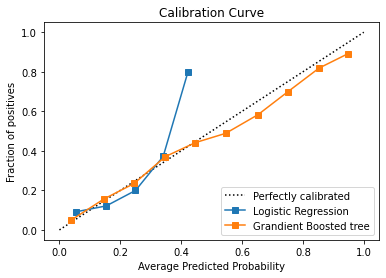

In [82]:
# Add the calibration curve for the gradient boosted tree

plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')   

plt.plot(mean_pred_val_lr, frac_of_pos_lr,

         's-', label='%s' % 'Logistic Regression')

plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,

         's-', label='%s' % 'Grandient Boosted tree')

plt.ylabel('Fraction of positives')

plt.xlabel('Average Predicted Probability')

plt.legend()

plt.title('Calibration Curve')

plt.show()